In [6]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt 
import mediapipe as mp 
import cv2


# For Reduce Dataset Size we Decide to Resize our image

In [8]:
def resize_image_to_100kb(image_path, output_path, max_size_kb=100):
    # Open an image file
    with Image.open(image_path) as img:
        # Initial save parameters
        quality = 85
        img_format = img.format

        # Reduce image quality until the file size is under the max_size_kb
        while True:
            # Save image to a temporary file
            img.save(output_path, format=img_format, quality=quality, optimize=True)
            size_kb = os.path.getsize(output_path) / 1024  # Size in KB

            if size_kb <= max_size_kb or quality <= 10:
                break
            quality -= 5

def resize_images_in_directory(input_dir, output_dir):
    # Walk through the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Resize and save the image
                resize_image_to_100kb(input_path, output_path)
                print(f"Processed and saved: {output_path}")


In [5]:
# Example usage
input_image_path = 'sample/good.jpg'
output_image_path = 'sample/good-100kb.jpg'

resize_image_to_100kb(input_image_path, output_image_path)

# Check if image size 100kb its matter?

c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


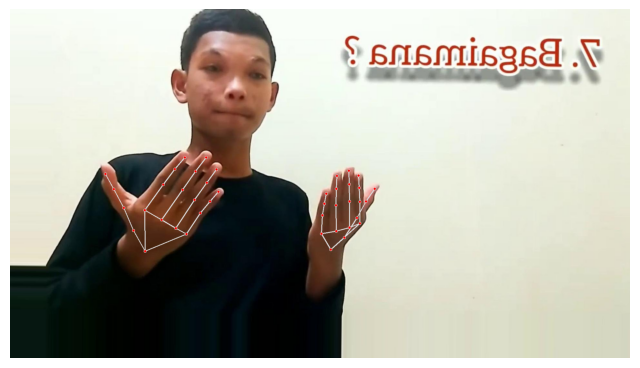

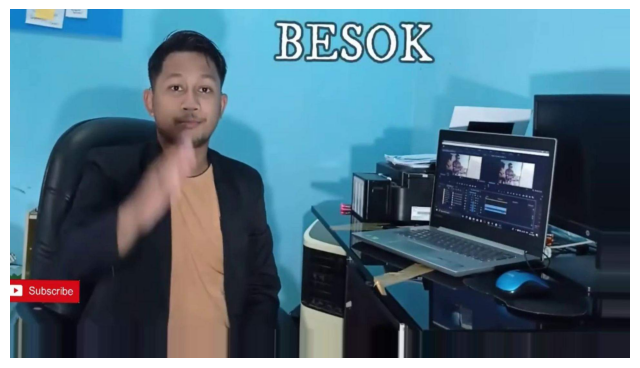

In [7]:
def detect_hand_landmarks(image_path):
    # Load model
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
    mp_drawing = mp.solutions.drawing_utils
    
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image
    results = hands.process(image_rgb)
    
    # Draw landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    # Convert image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show image with landmarks using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

good_img_path = 'sample/good-100kb.jpg'
bad_img_path = 'sample/bad-100kb.jpg'

# Contoh penggunaan
detect_hand_landmarks(good_img_path)
detect_hand_landmarks(bad_img_path)

# Because the result doesnt matter let's go to resize

In [10]:
# Example usage:
input_directory = 'whisnu-dataset'
output_directory = 'whisnu-dataset-resize'
resize_images_in_directory(input_directory, output_directory)

Processed and saved: whisnu-dataset-resize\bagaimana\0_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\0_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\100_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\100_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\101_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\101_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\102_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\102_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\103_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\103_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\104_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\104_bagaimana_2.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\105_bagaimana_1.jpg
Processed and saved: whisnu-dataset-resize\bagaimana\10

In [11]:
# Example usage:
input_directory = 'whisnu-augmented-dataset'
output_directory = 'whisnu-augmented-dataset-resize'
resize_images_in_directory(input_directory, output_directory)

Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_0_bagaimana_1.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_0_bagaimana_2.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_100_bagaimana_1.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_100_bagaimana_2.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_101_bagaimana_1.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_101_bagaimana_2.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_102_bagaimana_1.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_102_bagaimana_2.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_103_bagaimana_1.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_103_bagaimana_2.jpg
Processed and saved: whisnu-augmented-dataset-resize\bagaimana\aug-0_104_bagaimana_1.jpg
Processed and saved: whis

In [12]:
# Example usage:
input_directory = 'whisnu-annotated-dataset'
output_directory = 'whisnu-annotated-dataset-resize'
resize_images_in_directory(input_directory, output_directory)

Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_0_bagaimana_1.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_0_bagaimana_2.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_100_bagaimana_1.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_100_bagaimana_2.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_101_bagaimana_1.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_101_bagaimana_2.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_102_bagaimana_1.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_102_bagaimana_2.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_103_bagaimana_1.png
Processed and saved: whisnu-annotated-dataset-resize\bagaimana\annotated_aug-0_103_bagaimana_2.png
Processed and 

KeyboardInterrupt: 

In [13]:
def count_file(directory):
    file_count_per_class = {}
    total_files = 0

    for root, dirs, files in os.walk(directory):
        class_name = root.split(os.sep)[-1]
        count = sum(1 for file in files if file.endswith(".png") or file.endswith(".jpg"))
        
        if count > 0:
            file_count_per_class[class_name] = count
            total_files += count

    for class_name, count in file_count_per_class.items():
        print(f"{class_name}: {count}")

    print(f"Total Dataset: {total_files}")
    
print(f"{count_file('whisnu-annotated-dataset')}")
print(f"{count_file('whisnu-annotated-dataset-resize')}")

bagaimana: 4700
besok: 4131
hari: 3612
jawab: 4050
kantor: 4977
kemarin: 4104
kerja: 4862
lusa: 3495
malam: 3609
nanti: 3476
pagi: 3807
sekarang: 3130
siang: 3540
sore: 3630
Total Dataset: 55123
None
bagaimana: 1069
Total Dataset: 1069
None
